# Install Hakai Timeseries Processing Package ( Google Colab)

In [12]:
!pip install git+https://github.com/HakaiInstitute/process_ocean_timeseries.git

  Running command git clone -q https://github.com/HakaiInstitute/process_ocean_timeseries.git 'C:\Users\jessy\AppData\Local\Temp\pip-req-build-wi74qpxo'



  Cloning https://github.com/HakaiInstitute/process_ocean_timeseries.git to c:\users\jessy\appdata\local\temp\pip-req-build-wi74qpxo
  Created wheel for process-ocean-data: filename=process_ocean_data-0.1.0-py3-none-any.whl size=19517 sha256=f8e91f8c1e1f6f18fded3295e2d8f7373e038d6562a5345a45a47c38d341f077
  Stored in directory: C:\Users\jessy\AppData\Local\Temp\pip-ephem-wheel-cache-h75vz9x9\wheels\ad\41\75\50f10ea73423e9b592c7cf28c9a4ad0ce309ceb160fca1763d
Successfully built process-ocean-data


# Import the CTD timeseries method

In [22]:
from process_ocean_data import process_ctd_timeseries
from process_ocean_data.tools import qc as qc

import ipywidgets as widgets
import xarray as xr

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Retrieve Hakai Deployment Log

In [2]:
# Retrieve Hakai Instrument Deployment Log 
instrument_log = process_ctd_timeseries.get_hakai_ctd_log()
instrument_log

Retrieve Time Zone Internal Clock Sync or Start Time
Triangulate deployment location


,Project,Instrument Type,Instrument Manufacturer,Instrument Sub Type,Serial Number,Platform,Anchor Type,Scientist,BatteryIn Voltage (V),Deployment Setup,...,Latitude:Triangulation4,Longitude:Triangulation4,Range:Triangulation4,Instrument_clock_seconds_utc_offset,sub_path,file_name,Latitude:Triangulation_Results,Longitude:Triangulation_Results,Latitude,Longitude
0,Hakai Oceanography-Modeling,CTD+DO,Seabird,SBE37 SMP-ODO,21328,Taut Line Mooring,500lb Steel,Jessy Barrette; Jenn Jackson,3.67V,https://drive.google.com/drive/folders/1DkcPgM...,...,None,None,None,0.0,Calvert/DFO3/,Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Cal...,51.601505,-127.531247,51.601505,-127.531247
1,Hakai Oceanography-Modeling,CTD+DO,Seabird,SBE37 SMP-ODO,21421,Taut Line Mooring,500lb Steel,Jessy Barrette; Jenn Jackson,3.67V,https://drive.google.com/drive/folders/1DkcPgM...,...,None,None,None,0.0,Calvert/DFO3/,Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21421_Cal...,51.601505,-127.531247,51.601505,-127.531247
2,Hakai Oceanography-Modeling,CTD+DO,Seabird,SBE37 SMP-ODO,21328,Taut Line Mooring,500lb Steel,Jessy Barrette; Jenn Jackson,3.67V,https://drive.google.com/drive/folders/1f3SSdl...,...,None,None,None,0.0,Calvert/DFO3/,Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Cal...,51.599773,-127.528539,51.599773,-127.528539
3,Hakai Oceanography-Modeling,CTD+DO,Seabird,SBE37 SMP-ODO,21421,Taut Line Mooring,500lb Steel,Jessy Barrette; Jenn Jackson,3.67V,https://drive.google.com/drive/folders/1f3SSdl...,...,None,None,None,0.0,Calvert/DFO3/,Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21421_Cal...,51.599773,-127.528539,51.599773,-127.528539


# Download Data Locally To be Processed

In [3]:
instrument_log = process_ctd_timeseries.download_raw_data(instrument_log)

Download .\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Calvert-DFO3_20200211-20200828.cnv: : 7.40625MB [00:02,  3.15MB/s]
Download .\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21421_Calvert-DFO3_20200211-20200828.cnv: : 7.40625MB [00:02,  3.30MB/s]


Read .\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Calvert-DFO3_20200211-20200828.cnv


Problems with datetime


Save to Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Calvert-DFO3_20200211-20200828_L0.nc
Saving netcdf output file: .\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Calvert-DFO3_20200211-20200828_L0.nc

Variabes
scan
	long_name: Record Scan Number
	name: scan
	id: 0
	SBE_short_name: scan
	SBE_long_name: Scan Count
	span: ['1', '57721']
time
	long_name: Instrument Time
	units: seconds since 2000, Jan 01 00:00:00
	name: time
	id: 1
	SBE_short_name: timeK
	SBE_long_name: Time, Instrument [seconds]
	span: ['634684801', '652041001']
timeS
	long_name: Elapsed time since instrument start
	units: seconds
	name: timeS
	description: This output seems to have some issues and do not refect time gaps in original data. Use TimeK output as much as possible
	id: 2
	SBE_short_name: timeS
	SBE_long_name: Time, Elapsed [seconds]
	span: ['0.000', '17316000.0']
TEMPS901
	long_name: Sea Water Temperature
	standard_name: sea_water_temperature
	units: degC [ITS-90]
	name: TEMPS901
	id: 3
	SBE_short_name: tv290C
	S

PermissionError: [Errno 13] Permission denied: b'C:\\Users\\jessy\\Documents\\repositories\\process_ocean_timeseries\\notebooks\\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Calvert-DFO3_20200211-20200828_L1.nc'

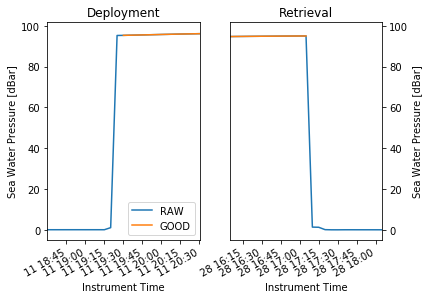

In [37]:
# Apply Standard Processing to the data
file_list = []
for index, row in instrument_log.iterrows():
    file_list +=[process_ctd_timeseries.process_data(row)]

In [15]:
# Retrieve processed Files
file_list = [item for item in file_list if item]
l1_files = [item['l1'] for item in file_list]

# Manual Review (Not compatible with Google Colab)


In [18]:
# Review one file at the time
file_selection = widgets.Select(
    options=l1_files,
    value=l1_files[0],
    description='File to review:'
)
file_selection

Select(description='File to review:', options=('.\\Hakai_Seabird-CTD+DO-SBE37 SMP-ODO-SN21328_Calvert-DFO3_202…

In [34]:
# Load Data 
ds = xr.open_dataset(file_selection.value)
df = ds.to_dataframe().reset_index()


In [35]:
# Generate a review flag from the QARTOD aggregate. If present the review flag will overwrite the QARTOD flag on a L2 data
flag_to_review = "qartod_aggregate"
for var in df.filter(like=flag_to_review).columns:
    df[var.replace(flag_to_review,'review_flag')] = df[var].astype(int).astype(str)

In [36]:
# NOT COMPATIBLE WITH GOOGLE COLAB 
qc.manual_qc_interface(df,
                       variable_list= ['TEMPS901','PSALST01', 'DOXYZZ01', 'CNDCST01'],
                       flags= {'GOOD':'1','UNKNOWN':'2','SUSPECT':'3','FAIL':'4','MISSING':'9'},
                       review_flag='_review_flag')

In [33]:
df

,time,instrument_model,instrument_type,scan,timeS,TEMPS901,PSALST01,PRESPR01,OXYSAT,DOXYZZ01,...,TEMPS901_review_flag,CNDCST01_review_flag,PSALST01_review_flag,DOXYZZ01_review_flag,depth_review_flag_review_flag,PRESPR01_review_flag_review_flag,TEMPS901_review_flag_review_flag,CNDCST01_review_flag_review_flag,PSALST01_review_flag_review_flag,DOXYZZ01_review_flag_review_flag
0,2020-02-11 19:30:04,37SMP-ODO-SDI12,CTD-ODO,133.0,0 days 11:00:00,8.3991,31.7746,95.359,6.67955,6.246,...,1,1,1,1,1,1,1,1,1,1
1,2020-02-11 19:35:04,37SMP-ODO-SDI12,CTD-ODO,134.0,0 days 11:05:00,8.4004,31.7848,95.433,6.67892,5.834,...,1,1,1,1,1,1,1,1,1,1
2,2020-02-11 19:40:04,37SMP-ODO-SDI12,CTD-ODO,135.0,0 days 11:10:00,8.4208,31.7950,95.500,6.67542,5.621,...,1,1,1,1,1,1,1,1,1,1
3,2020-02-11 19:45:04,37SMP-ODO-SDI12,CTD-ODO,136.0,0 days 11:15:00,8.4582,31.8105,95.573,6.66913,5.494,...,1,1,1,1,1,1,1,1,1,1
4,2020-02-11 19:50:04,37SMP-ODO-SDI12,CTD-ODO,137.0,0 days 11:20:00,8.5114,31.8343,95.644,6.66014,5.396,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57279,2020-08-28 16:45:04,37SMP-ODO-SDI12,CTD-ODO,57412.0,199 days 08:15:00,7.8011,32.8648,94.992,6.72245,2.409,...,1,1,1,1,1,1,1,1,1,1
57280,2020-08-28 16:50:04,37SMP-ODO-SDI12,CTD-ODO,57413.0,199 days 08:20:00,7.8015,32.8641,95.010,6.72242,2.405,...,1,1,1,1,1,1,1,1,1,1
57281,2020-08-28 16:55:04,37SMP-ODO-SDI12,CTD-ODO,57414.0,199 days 08:25:00,7.7996,32.8681,95.027,6.72253,2.402,...,1,1,1,1,1,1,1,1,1,1
57282,2020-08-28 17:00:04,37SMP-ODO-SDI12,CTD-ODO,57415.0,199 days 08:30:00,7.7837,32.9007,95.045,6.72352,2.398,...,1,1,1,1,1,1,1,1,1,1
